In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path = os.path.join(os.getcwd(),"Fruits_vegetables","train")
data_test_path = os.path.join(os.getcwd(),"Fruits_vegetables","test")
data_val_path = os.path.join(os.getcwd(),"Fruits_vegetables","validation")

In [4]:
img_width = 180
img_height = 180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
  data_train_path,
  shuffle=True,
  image_size=(img_width,img_height),
  batch_size=32,
  validation_split = False
  )

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
  data_val_path,
  shuffle=False,
  image_size=(img_width,img_height),
  batch_size=32,
  validation_split = False
  )

Found 351 files belonging to 36 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
  data_test_path,
  shuffle=False,
  image_size=(img_width,img_height),
  batch_size=32,
  validation_split = False
  )

Found 359 files belonging to 36 classes.


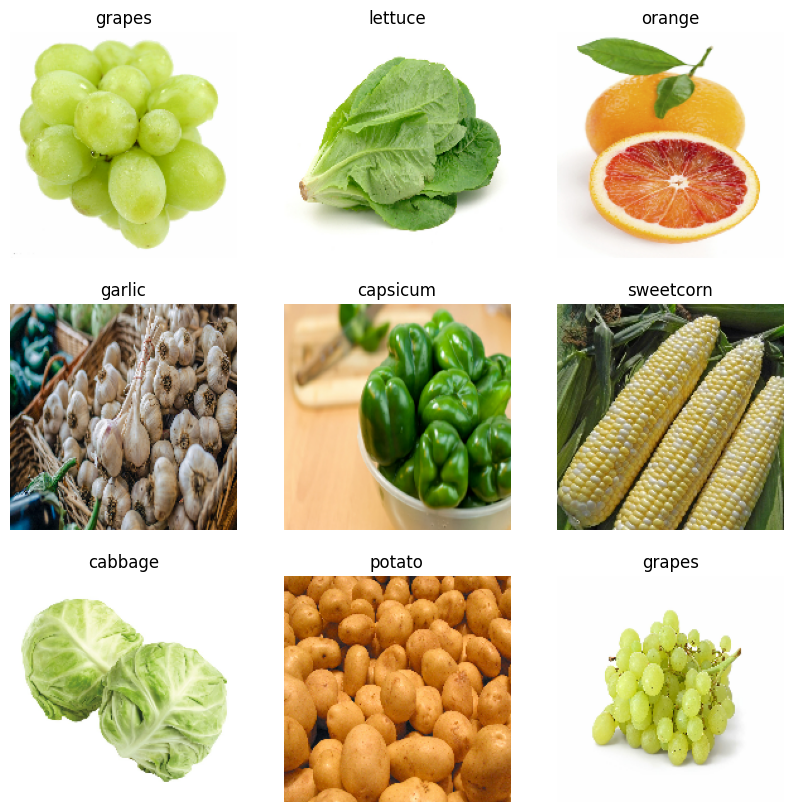

In [8]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [9]:
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.0688 - loss: 3.7322 - val_accuracy: 0.3561 - val_loss: 2.3595
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.2915 - loss: 2.5369 - val_accuracy: 0.6467 - val_loss: 1.3784
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.4549 - loss: 1.8827 - val_accuracy: 0.7949 - val_loss: 0.8227
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.6765 - loss: 1.1386 - val_accuracy: 0.8718 - val_loss: 0.5954
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.8076 - loss: 0.6832 - val_accuracy: 0.9202 - val_loss: 0.4314
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.8990 - loss: 0.3567 - val_accuracy: 0.9402 - val_loss: 0.3893
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.9493 - loss: 0.2323 - val_accuracy: 0.9459 - val_loss: 0.4322
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.9541 - loss: 0.1921 - val_accu

Text(0.5, 1.0, 'Loss')

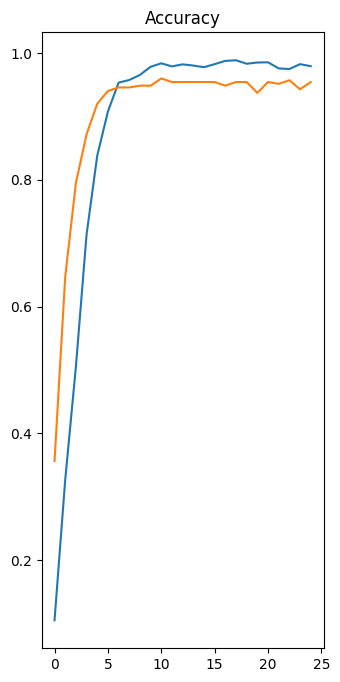

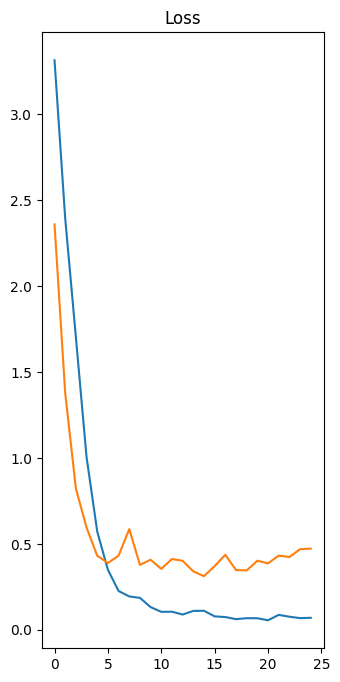

In [13]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [14]:
path = os.path.join(os.getcwd(),"Fruits_vegetables","test", "carrot", "Image_1.jpg")
image = tf.keras.utils.load_img(path, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [15]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [16]:
score = tf.nn.softmax(predict)

In [17]:
print('Image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Image is carrot with accuracy of 99.82


In [18]:
model.save('Image_classify.keras')

In [21]:
cat_df = pd.DataFrame(data_cat)
cat_df.to_csv("categories.csv", header=False, index = False)